**Another explanation about PCA**

 we are going to view another explanation about Principal Component Analysis(PCA). PCA is a statistical technique invented in 1901 by Karl Pearson that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components.
 
 PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random


To start, let us consider a pair of random variables x, y. Consider the base case when y = n * x. The x and y variables will be perfectly correlated to each other since y is just a scaling of x.

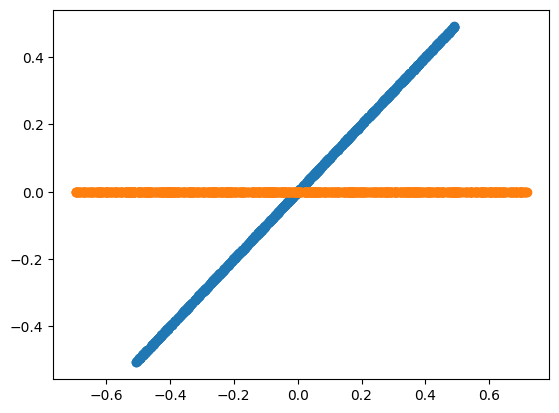

In [3]:
n = 1   # The amount of the correlation
x = np.random.uniform(1, 2, 1000)   # Generate 1000 samples from a uniform random variable
y = x.copy()

# PCA works better if the data is centered 
x = x - np.mean(x)  
y = y - np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data['x'], data['y'])

pca = PCA(n_components=2)   # Instanciate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it get s the rotation matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)

**Understanding the transformation model pcaTr**


As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices.

1. pcaTr.components_ has the rotation matrix

2. pcaTr.explained_variance_ has the explained variance of each principal component


In [6]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.59305962e-01 1.44114110e-34]


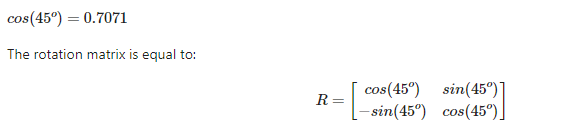

And 45 is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

Then, PCA has identified the angle in which point the original variables.

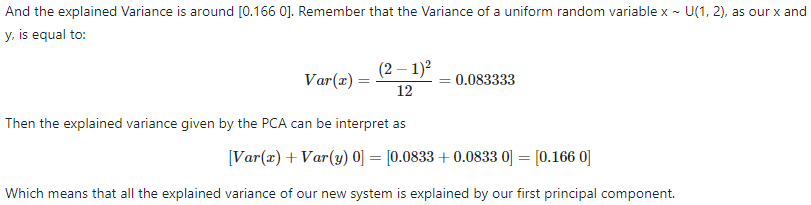

**Correlated Normal Random Variables**

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them. 
The only way I know to get such a dataset is, first, create two independent Normal random variables with the desired variances and then combine them using a rotation matrix. In this way, the new resulting variables will be a linear combination of the original random variables and thus be dependent and correlated.


angle: 45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


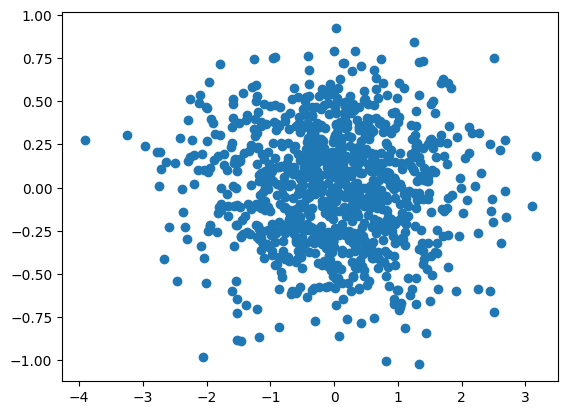

In [18]:
import matplotlib.lines as mlines
import matplotlib.transforms as transforms

random.seed(100)

std1 = 1    # The desired standard deviation of our first random variable
std2 = 0.333

x = np.random.normal(0, std1, 1000)  # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # The desired standard deviation of our second random variable 

# PCA works better if the data is centered 
x = x - np.mean(x)
y = y - np.mean(y)

# Define a pair of dependent variabes with a desired ampunt of covariance
n = 1   # magnitude of covariance
angle = np.arctan(1/n)  # Convert the covariance to an angle
print('angle:', angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                          [-np.sin(angle), np.cos(angle)]])

print("rotationMatrix")
print(rotationMatrix) 

xy = np.concatenate(([x], [y]), axis = 0).T


# transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix)

# Plot the rotated data
# plt.scatter(data[:,0], data[:, 1])

plt.scatter(x, y)


Let us print the original and the resulting transformed system using the result of the PCA in the same plot alongside with the 2 Principal Component vectors in red and blue

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.71813058 -0.69590837]
 [ 0.69590837 -0.71813058]]

Eigenvalues or explained variance
[1.07359898 0.11118208]


C:\Users\Mit\AppData\Local\Temp\ipykernel_13060\3222916854.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
C:\Users\Mit\AppData\Local\Temp\ipykernel_13060\3222916854.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


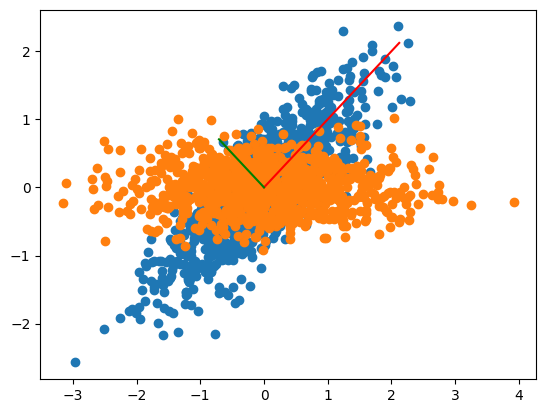

In [22]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)


print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()

The explanation of this chart is as follows:

1. The rotation matrix used to create our correlated variables took the original uncorrelated variables x and y and transformed them into the blue points.

2. The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.

3. The explained Variance of the PCA is

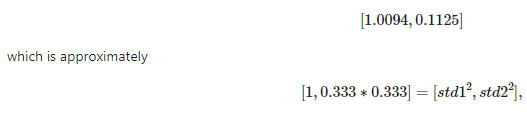

**PCA as a strategy for dimensionality reduction**

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that generalize the data. Nevertheless, for some applications, we are interested in the patterns that explain much less Variance, for example, in novelty detection.

In the next figure, we can see the original data and its corresponding projection over the first and second principal components. In other words, data comprised of a single variable.

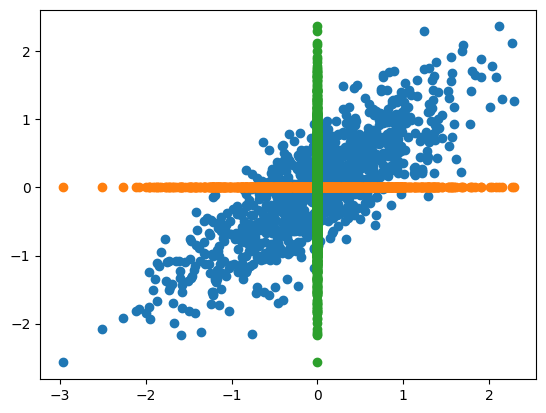

In [24]:
nPoints = len(data)
# Plot the original data in blue
plt.scatter(data[:, 0], data[:, 1])

# Plot the projection along the first component in arange
plt.scatter(data[:, 0], np.zeros(nPoints))

# Plot the projection along the scond component in green
plt.scatter(np.zeros(nPoints), data[:, 1])


**PCA as a strategy to plot complex data**

The next chart shows a sample diagram displaying a dataset of pictures of cats and dogs. Raw pictures are composed of hundreds or even thousands of features. However, PCA allows us to reduce that many features to only two. In that reduced space of uncorrelated variables, we can easily separate cats and dogs.